**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

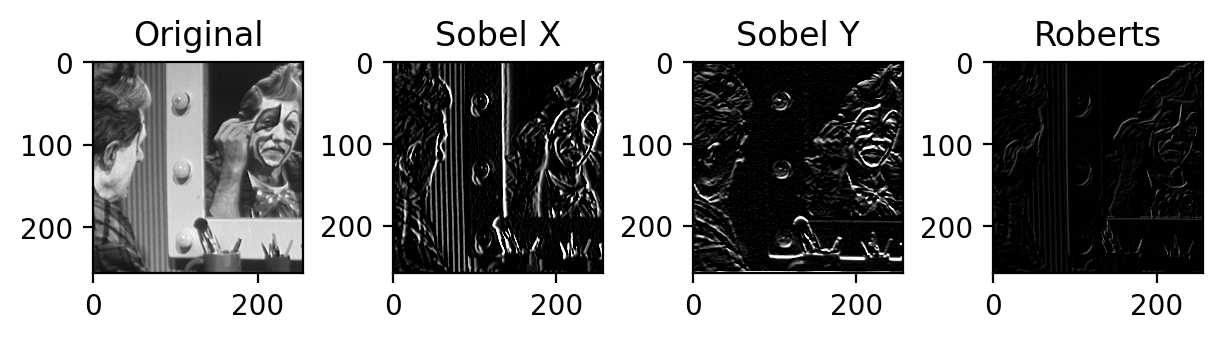

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

hx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
img_sobel_x = convolve2d(img, hx)

hy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
img_sobel_y = convolve2d(img, hy)

hr = np.array([[1,0],[0,-1]])
img_roberts = convolve2d(img, hr)

fig, axes = plt.subplots(1,4, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Sobel X")
axes[1].imshow(img_sobel_x, cmap='gray', vmin=0, vmax=255)
axes[2].set_title("Sobel Y")
axes[2].imshow(img_sobel_y, cmap='gray', vmin=0, vmax=255)
axes[3].set_title("Roberts")
axes[3].imshow(img_roberts, cmap='gray', vmin=0, vmax=255)

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

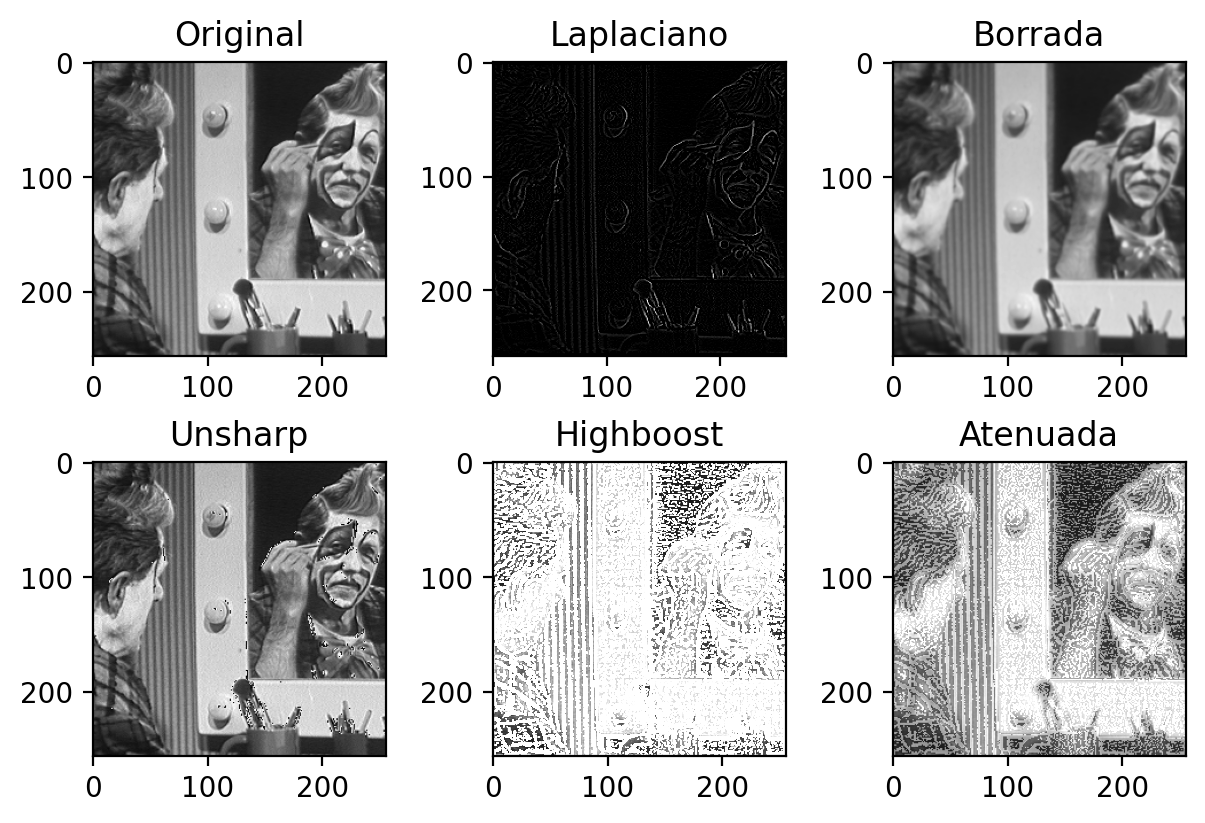

In [38]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

hl = np.array([[0,1,0],[1,-4,1],[0,1,0]])
img_laplaciano = convolve2d(img, hl)

img_borrada = cv2.GaussianBlur(img, (5,5), 1)
mascara = img - img_borrada

unsharp_masking = img + 1*mascara
highboost_filtering = img + 4.5*mascara
img_atenuada = img + 0.5*mascara

fig, axes = plt.subplots(2,3, layout="constrained")
axes[0,0].set_title("Original")
axes[0,0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0,1].set_title("Laplaciano")
axes[0,1].imshow(img_laplaciano, cmap='gray', vmin=0, vmax=255)
axes[0,2].set_title("Borrada")
axes[0,2].imshow(img_borrada, cmap='gray', vmin=0, vmax=255)
axes[1,0].set_title("Unsharp")
axes[1,0].imshow(unsharp_masking, cmap='gray', vmin=0, vmax=255)
axes[1,1].set_title("Highboost")
axes[1,1].imshow(highboost_filtering, cmap='gray', vmin=0, vmax=255)
axes[1,2].set_title("Atenuada")
axes[1,2].imshow(img_atenuada, cmap='gray', vmin=0, vmax=255)


3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

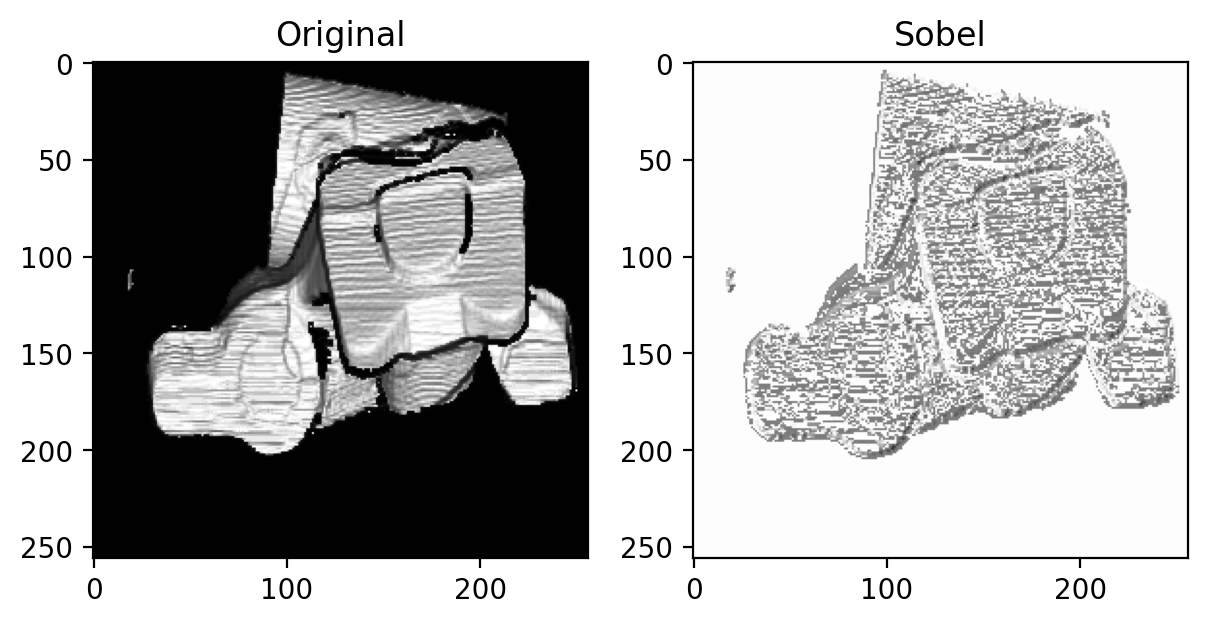

In [5]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)

# escala da imagem por um fator de 0.25
scaled_img = img * 0.25

# Aplicação do operador Sobel
sobelx = cv2.Sobel(scaled_img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(scaled_img, cv2.CV_64F, 0, 1, ksize=3)

# Normalize a saída para evitar saturação
sobelx = cv2.normalize(sobelx, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
sobely = cv2.normalize(sobely, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Combine as componentes x e y para obter a imagem de bordas
edges = cv2.bitwise_or(sobelx, sobely)

fig, axes = plt.subplots(1,2, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Sobel")
axes[1].imshow(edges, cmap='gray', vmin=0, vmax=255)

4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

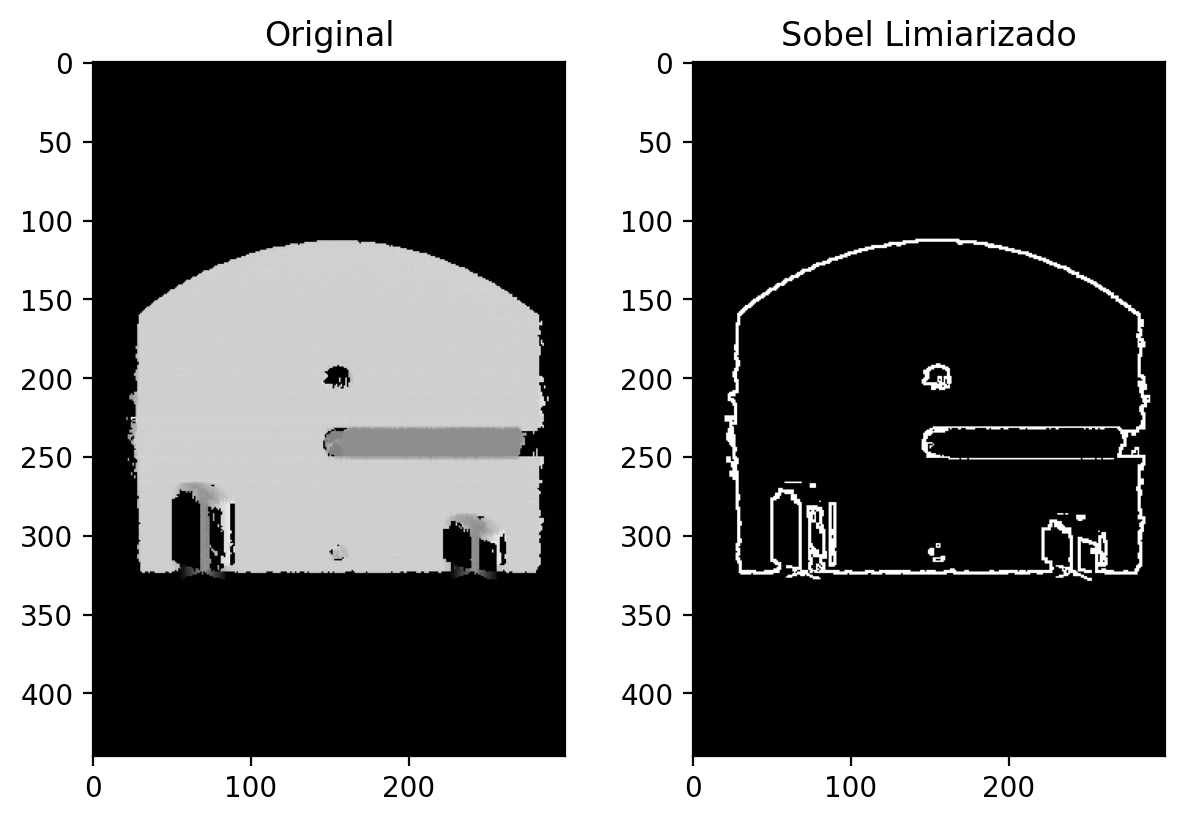

In [7]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

# Aplicação do operador Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calcule a magnitude do gradiente
magnitude = cv2.magnitude(sobelx, sobely)

# Limiarização com valor 150
_, binary_image = cv2.threshold(magnitude, 150, 255, cv2.THRESH_BINARY)

fig, axes = plt.subplots(1,2, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Sobel Limiarizado")
axes[1].imshow(binary_image, cmap='gray', vmin=0, vmax=255)

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

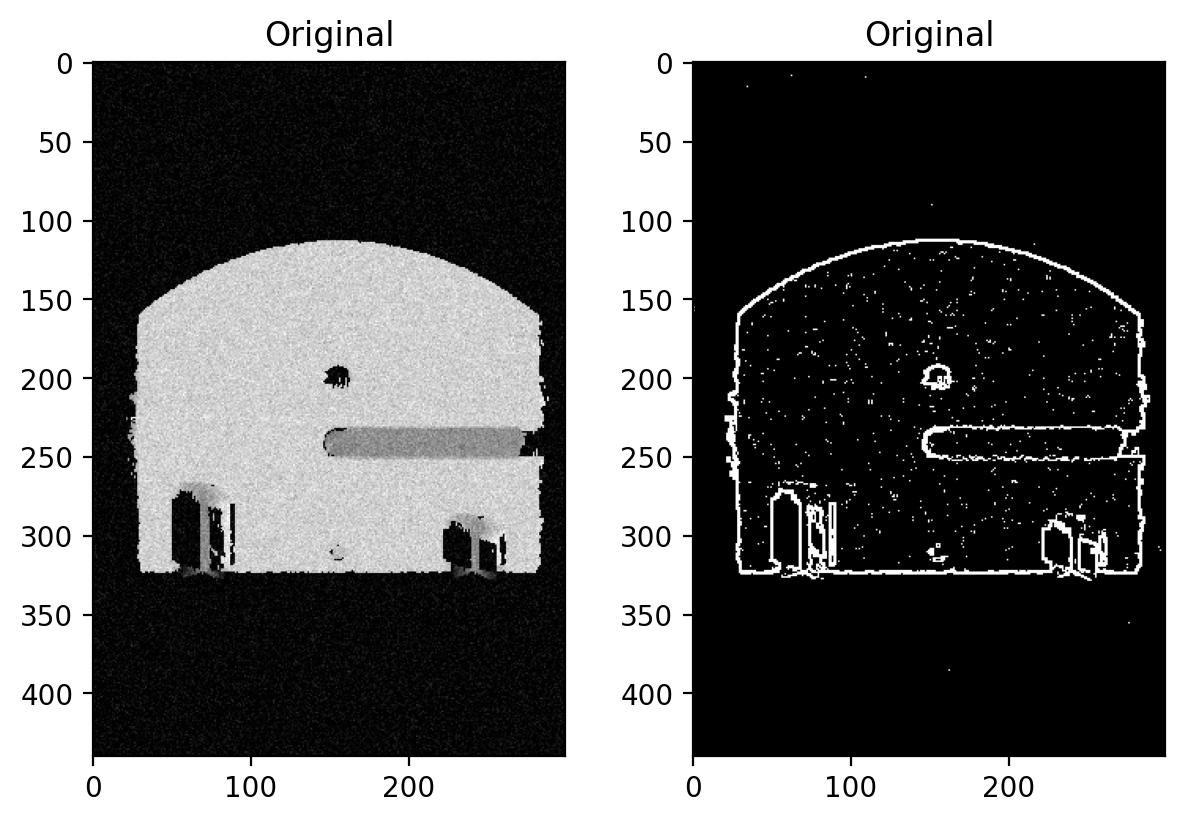

In [8]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 200

img = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

# Aplicação do operador Sobel
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calcule a magnitude do gradiente
magnitude = cv2.magnitude(sobelx, sobely)

# Limiarização com valor 150
_, binary_image = cv2.threshold(magnitude, 150, 255, cv2.THRESH_BINARY)

fig, axes = plt.subplots(1,2, layout="constrained")
axes[0].set_title("Original")
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("Original")
axes[1].imshow(binary_image, cmap='gray', vmin=0, vmax=255)